# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import math #I want to use this for log transformations.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

C:\Users\Kippy\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Kippy\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

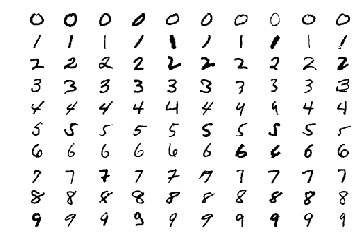

In [19]:
def P1(num_examples=10):

    ### STUDENT START ###

    #First we'll load up 10 examples of each digit, so we need a 10x10 matrix (list of lists)
    examples=[[None for i in range(num_examples)] for j in range(10)]
    examples_counter = [0]*10 #keep track of the number of examples.
    
    #Loop through the mini_train_labels until we have 10 of every example
    i = 0
    while min(examples_counter) < num_examples: #while we don't have 10 of every example
        Y = int(mini_train_labels[i]) 
        if examples_counter[Y] < num_examples: #if we don't have 10 examples of this number yet
            examples[Y][examples_counter[Y]] = (np.reshape(mini_train_data[i], (28,28))) #Process the data into matrix form
            examples_counter[Y] += 1
        i += 1
    
    #plot our examples!
    fig, axes = plt.subplots(10, num_examples)
    for digit in range(10):
        for j in range(num_examples):
            axes[digit,j].imshow(examples[digit][j], cmap = "gray_r")
            axes[digit,j].axis('off')
    ### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [24]:
def P2(k_values):

    ### STUDENT START ###
    for k in k_values:
        neigh = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
        neigh.fit(mini_train_data, mini_train_labels)
        prediction = neigh.predict(dev_data)
        target_names = ['0','1','2','3','4','5','6','7','8','9']
        print("Accuracy on set with k = ", k," : ",  neigh.score(dev_data, dev_labels))
        if k == 1:
            print("k = 1")
            print(classification_report(dev_labels, prediction, target_names=target_names))
    
    ### STUDENT END ###

k_values = [1,3,5,7]
P2(k_values)

Accuracy on set with k =  1  :  0.977
k = 1
             precision    recall  f1-score   support

          0       0.96      1.00      0.98        99
          1       1.00      1.00      1.00       105
          2       0.98      0.96      0.97       102
          3       0.95      0.97      0.96        86
          4       0.99      0.98      0.99       104
          5       0.97      0.97      0.97        91
          6       0.99      0.98      0.98        98
          7       0.99      0.98      0.99       113
          8       0.98      0.93      0.95        96
          9       0.95      1.00      0.98       106

avg / total       0.98      0.98      0.98      1000



ANSWER: The problematic numbers here are 3 and 9. I looked at the f1-scores for all other k-values (not published). 3 and 9 were consistently the worst two, but sometimes one was worse than the other and vice-versa.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [26]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    runtimes = []
    for train_size in train_sizes:
        start = time.time()
        neigh = KNeighborsClassifier(n_neighbors = 1, n_jobs = -1)
        neigh.fit(train_data[:train_size], train_labels[:train_size])
        accuracies.append(neigh.score(dev_data, dev_labels))
        runtimes.append(time.time() - start)
        

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

Predicted accuracy for 60000:  124.307226036 %
[ 1.0134645]


C:\Users\Kippy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


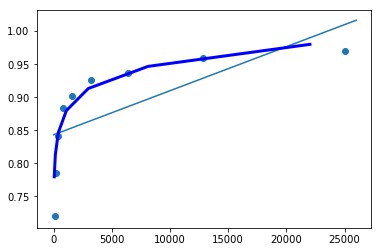

In [27]:
def P4():

### STUDENT START ###
    T = np.array(train_sizes)
    
    #Setup our Linear Regression Object
    naive_model = LinearRegression()
    naive_model.fit(T[:, np.newaxis] , accuracies) # I do not understand why we need np.newaxis here, but it's the only way I could make it work.
    prediction = naive_model.predict(T[:, np.newaxis])
    
    #Plot our linear model
    x = np.linspace(0,26000,100)
    y = [(naive_model.coef_[0]*x1 + naive_model.intercept_) for x1 in x]
    plt.plot(x,y)
    
    #Plot our training Data
    plt.scatter(train_sizes,accuracies)
    
    #This is why a linear model is bad.
    print('Predicted accuracy for 60000: ',  100*(naive_model.coef_[0]*60000+naive_model.intercept_), '%')
    
    #Now we transform with log, we also make the right tail heavier to approximate better end behavior.
    T = np.array(train_sizes)
    sampleweight = np.array([1,1,1,1,1,1,1,5,10])
    for i in range(len(T)):
        T[i] = math.log(T[i])
    astute_model = LinearRegression()
    astute_model.fit(T[:, np.newaxis], accuracies, sample_weight = sampleweight)
    
    Transform = list(T)
    for i in range(len(Transform)):
        Transform[i] = math.pow(math.e,Transform[i])
    plt.plot(Transform, astute_model.predict(T[:, np.newaxis]), color='blue', linewidth=3)
    
    print(astute_model.predict([math.log(60000)]))
    
    
### STUDENT END ###,

P4()

ANSWER: As we can see from the above graph, this is clearly not a linear relationship. We see that with n = 60000, we predict 124% accuracy. An absurd notion. Instead we will transform our input. When we apply a log transform, get a predicted accuracy of 101% which while we knoew this is absurd still, we can conclude from this much better fit of a model that we are asymptotically approaching 100% accuracy as the sample size increases (we do not expect to ever reach 100% accuracy!).

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

These  9 's were labelled  4 .


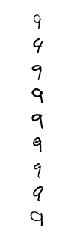

In [8]:
def P5():

### STUDENT START ###
    neigh = KNeighborsClassifier(n_neighbors = 1, n_jobs = -1)
    neigh.fit(mini_train_data, mini_train_labels)
    prediction = neigh.predict(dev_data)
    confusion = confusion_matrix(dev_labels, prediction, labels = [0,1,2,3,4,5,6,7,8,9])
    #we want to find the whereabouts of the element of this matrix with maximum values. But the main diagonal is the largest.
    #Since these are correct we don't care about them and will replace them with 0 so that they are not maximal
    for i in range(10):
        confusion[i][i] = 0
    
    #Now we find the location of the largest value in the matrix and take note of the row, column
    x, y = np.argmax(np.max(confusion, axis=0)), np.argmax(np.max(confusion, axis=1))
    
    print("These ", x, "'s were labelled ", y, ".")
    
    #now we will find some examples to plot
    examples = []
    i = 0
    while len(examples) < 11 and i < len(prediction): # We're going to get 10 examples or all of them, whichever is fewer.
        if dev_labels[i] == x and prediction[i] == y:
            examples.append(np.reshape(dev_data[i], (28,28)))
        i += 1
    
    #plot our examples!
    fig, axes = plt.subplots(len(examples), 1)
    for j in range(len(examples)):
            axes[j].imshow(examples[j], cmap = "gray_r")
            axes[j].axis('off')
    
### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

Processed training data with regular dev_data.
             precision    recall  f1-score   support

          0       0.88      0.97      0.92        99
          1       0.94      0.98      0.96       105
          2       0.99      0.75      0.86       102
          3       0.82      0.81      0.82        86
          4       0.91      0.82      0.86       104
          5       0.93      0.84      0.88        91
          6       0.94      0.92      0.93        98
          7       0.83      0.92      0.87       113
          8       0.85      0.91      0.88        96
          9       0.74      0.84      0.78       106

avg / total       0.88      0.88      0.88      1000

Regular training data with processed dev_data.
             precision    recall  f1-score   support

          0       0.93      0.97      0.95        99
          1       0.76      0.99      0.86       105
          2       0.97      0.87      0.92       102
          3       0.73      0.85      0.78        86
 

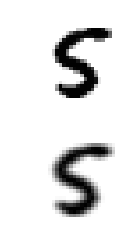

In [22]:
def P6():
    
### STUDENT START ###
    target_names = ['0','1','2','3','4','5','6','7','8','9']
   
    #with processed training data and regular dev_data
    neigh = KNeighborsClassifier(n_neighbors = 1, n_jobs = -1)
    neigh.fit(processed_mini_train_data, mini_train_labels)
    prediction = neigh.predict(dev_data)
    print("Processed training data with regular dev_data.")
    print(classification_report(dev_labels, prediction, target_names=target_names))
            
    #with regular training data and processed dev_data
    neigh = KNeighborsClassifier(n_neighbors = 1, n_jobs = -1)
    neigh.fit(mini_train_data, mini_train_labels)
    prediction = neigh.predict(processed_dev_data)
    print("Regular training data with processed dev_data.")
    print(classification_report(dev_labels, prediction, target_names=target_names))
    
    #with both sets preprocessed
    neigh = KNeighborsClassifier(n_neighbors = 1, n_jobs = -1)
    neigh.fit(processed_mini_train_data, mini_train_labels)
    prediction = neigh.predict(processed_dev_data)
    print("Processed training data with processed dev_data.")
    print(classification_report(dev_labels, prediction, target_names=target_names))

def smoother(image, weight):
    #weight is the percentage of value the border pixels have each
    processed_image = np.zeros(784)
    #Loop through every pixel in the image
    for i in range(28):
        for j in range(28):
            neighbors = [image[28*i+j]]
            #get all the neighbors of the pixel
            for k in range(-1, 2, 1):
                for l in range(-1, 2, 1): 
                    if i + 28*k >= 0 and j + l >= 0 and 28*(i+k) < 784 and j + l < 28: #make sure we're not over the boundary
                        if k != 0 or l != 0: #If both k, l are zero then we're just getting back i,j: our starting pixel.
                            neighbors.append(image[28*(i+k)+j+l])
            #now our processed pixel is the weighted average
            processed_image[28*i+j] = (neighbors[0] + weight*sum(neighbors[1:]))/(1+weight*(len(neighbors)-1))
    return processed_image

#We will blur our data outside the defined function so that we can refer to this in the extra credit.
weight = 1 #the pixel in question has weight 1, this sets the weights for all neighboring pixels.
#Process training data
processed_mini_train_data = []
for i in range(len(mini_train_data)):
    processed_mini_train_data.append(smoother(mini_train_data[i], weight))
        
#process dev_data
processed_dev_data = []
for i in range(len(dev_data)):
    processed_dev_data.append(smoother(dev_data[i], weight))
### STUDENT END ###

#plot our blurring examples!
fig, axes = plt.subplots(2, 1)
axes[0].imshow(np.reshape(mini_train_data[40], (28,28)), cmap = "gray_r")
axes[0].axis('off')
axes[1].imshow(np.reshape(processed_mini_train_data[40], (28,28)), cmap = "gray_r")
axes[1].axis('off')


P6()

ANSWER: When we preprocess both sets of data we get an extra point or 2 of accuracy. Points of accuracy are harder to come by the closer you get to 100% (see our regression earlier for intuition about this). Therefore I'm pretty happy about the increase in results here. I did not see a significant difference with different weights. A weighting in which each neighbor had the same weight as the original pixel had the same results as a weighting in which each neighbor had half the weight of the original pixel. We see here that we still do get an improvement when we blur all our data, both training and development.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [14]:
def P7():

### STUDENT START ##    
    #Input our data into the model and report score and classifier report
    bernoulli_bayes = BernoulliNB()
    bernoulli_bayes.fit(binarized_mini_train_data, mini_train_labels)
    print("Mean accuracy for binarized data: ",bernoulli_bayes.score(binarized_dev_data, dev_labels))
    print(classification_report(dev_labels, bernoulli_bayes.predict(binarized_dev_data)))
    
    #Now we group into 3 shades
    trinarized_mini_train_data = []
    for i in range(len(mini_train_data)):
        trinarized_mini_train_data.append((2*mini_train_data[i]).round(0))
        
    trinarized_dev_data = []
    for i in range(len(dev_data)):
        trinarized_dev_data.append((2*dev_data[i]).round(0))
        
    #Input our data into the model and report score and classifier report
    multi_bayes = MultinomialNB()
    multi_bayes.fit(trinarized_mini_train_data, mini_train_labels)
    print("Mean accuracy for trinarized data: ", multi_bayes.score(trinarized_dev_data, dev_labels))
    print(classification_report(dev_labels, multi_bayes.predict(trinarized_dev_data)))

 #First we binarize the data by pre-processing.


def binarize(data, ceiling = True):
    #This function takes an matrix and round all the values. There are two options. Round to the nearest of 0,1 or round up to 1.
    binarized_data = []
    for i in range(len(data)):
        #This code
        if ceiling:
            image = []
            for j in range(len(data[i])):
                if data[i][j] > 0:
                    image.append(1)
                else:  image.append(0)
            binarized_data.append(image)  ### This row can be interchanged with the row 2 below
        else:
        #This was the other option: I decided to round everything up so that it is more likely that regions are disconnected.
            binarized_data.append(data[i].round(0))  ###This row can be interchangedn with the row 2 above
    return binarized_data
    
#we want this as a global variable for future use in extra credit      
binarized_mini_train_data = binarize(mini_train_data, ceiling = False)
binarized_dev_data = binarize(dev_data, ceiling = False)
### STUDENT END ###

P7()

Mean accuracy for binarized data:  0.815
             precision    recall  f1-score   support

        0.0       0.92      0.98      0.95        99
        1.0       0.80      0.94      0.87       105
        2.0       0.85      0.78      0.82       102
        3.0       0.63      0.74      0.68        86
        4.0       0.88      0.80      0.84       104
        5.0       0.77      0.63      0.69        91
        6.0       0.89      0.87      0.88        98
        7.0       0.90      0.82      0.86       113
        8.0       0.80      0.74      0.77        96
        9.0       0.72      0.81      0.76       106

avg / total       0.82      0.81      0.81      1000

Mean accuracy for trinarized data:  0.806
             precision    recall  f1-score   support

        0.0       0.91      0.96      0.94        99
        1.0       0.89      0.92      0.91       105
        2.0       0.84      0.79      0.81       102
        3.0       0.64      0.76      0.70        86
        4.0 

ANSWER: When we add another dimension to all the features we suddenly enter a much(!) larger feature space. Instead of size 2^784 (237 digits), it is now 3^784 (375 digits). This new feature space is 10^38 times larger. The curse of dimensionality really kicks in here and doesn't allow us to improve on our results by adding more granularity.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [13]:
def P8(alphas):

### STUDENT START ###
    
    #Input our data into the model and report score and classifier report
    grid_search = GridSearchCV(BernoulliNB(), param_grid = alphas)
    grid_search.fit(binarized_mini_train_data, mini_train_labels)
    return grid_search

### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

C:\Users\Kippy\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\Users\Kippy\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\Users\Kippy\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:820: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
C:\Users\Kippy\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -


In [8]:
print(nb.best_params_)
print(nb.grid_scores_[0])

{'alpha': 0.01}
mean: 0.09200, std: 0.00080, params: {'alpha': 0.0}


ANSWER: As we see here the accuracy for alpha = 0 is merely 10.8%. This is abysmal because we have a lot of zero probabilities due the giant size of our feature space. alpha = 0 is in general pretty degenerate for naive bayes since naive bayes is extremely overconfident.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [12]:
def P9():

### STUDENT END ###

    #Input our data into the model and report score and classifier report
    gnb = GaussianNB()
    gnb.fit(mini_train_data, mini_train_labels)
    #fix the variance
    sigma = np.zeros((10,784)) + 0.01
    gnb.sigma_= sigma
    
    return gnb

### STUDENT END ###

gnb = P9()
print(gnb.score(dev_data, dev_labels))
print(np.mean(gnb.theta_), np.mean(gnb.sigma_))

0.802
0.130939368454 0.01


ANSWER: The issue is that the mean is nearly zero (small problem) and the variance is practically zero (huge problem). By increasing the variance by a small amount, we immediately jump back up to 80% accuracy, which is similar to our accuracy using Bernoulli Bayes.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

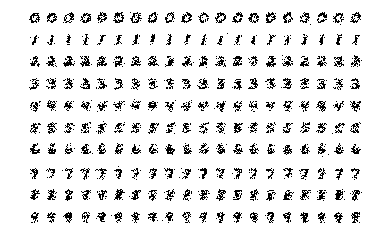

In [56]:
def P10(num_examples):

### STUDENT START ###
    bnb = BernoulliNB(alpha = nb.best_params_['alpha'])
    bnb.fit(binarized_mini_train_data, mini_train_labels)
    
    #create a matrix to store our examples
    examples=[[None for i in range(num_examples)] for j in range(10)]
    for digit in range(10):
        for j in range(num_examples):
            #creates a vector with a probability result for each pixel
            value = np.random.rand(784)
            #since we are bernoulli, we need only compare our random number so we take the log here instead of exp our proabilities
            value = np.log(value)
            #Booleans evaluate to 0 or 1, so we just compare our log-probabilities.
            examples[digit][j] = [value[i] <= bnb.feature_log_prob_[digit][i] for i in range(784)]
    
    #plot our examples!
    fig, axes = plt.subplots(10, num_examples)
    for digit in range(10):
        for j in range(num_examples):
            axes[digit,j].imshow(np.reshape(examples[digit][j], (28,28)), cmap = "gray_r")
            axes[digit,j].axis('off')
### STUDENT END ###

P10(20)

ANSWER: These digits speak for themselves... They're not fantastic. I can see the digits because I know what they're supposed to be, but these are not great! If only we could make connectivity of the lines a feature then these would be better. Some aspects of these that make them less recognizeable is that the points are independent! Therefore we get lots of disconnected cluusters that would not show up if someone were drawing a mostly continuous line with their hand. However, it does have a good enough understnading of the digits to show some of the features that a human brain can recognize (provided you squint hard enough).

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [57]:
def P11(buckets, correct, total):
    
### STUDENT START ###

    #Create our naive bayes model
    bnb = BernoulliNB(alpha = 0.001)
    bnb.fit(binarized_mini_train_data, mini_train_labels)
    prediction = bnb.predict_proba(binarized_dev_data)
    
    #loop through each prediction
    for i in range(len(prediction)):
        
        #find the maximum probability and the classifier associated to it
        classifier = np.argmax(prediction[i])
        maximum_prob = prediction[i][classifier]

        #Loop through the buckets to find the correct one. When we do, update the total and correct counters
        j, end = 0, True
        while buckets[j] < 1 and end:
            if maximum_prob < buckets[j]: 
                total[j] += 1
                if classifier == dev_labels[i]: correct[j] += 1
                end = False
            if maximum_prob == 1.0:
                total[-1] += 1
                if classifier == dev_labels[i]: correct[-1] += 1
                end = False
            j += 1
    
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

p(pred) <= 0.5000000000000    total =   1    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  29    accuracy = 0.345
p(pred) <= 0.9990000000000    total =  67    accuracy = 0.478
p(pred) <= 0.9999900000000    total =  61    accuracy = 0.459
p(pred) <= 0.9999999000000    total =  58    accuracy = 0.638
p(pred) <= 0.9999999990000    total =  47    accuracy = 0.532
p(pred) <= 0.9999999999900    total =  47    accuracy = 0.723
p(pred) <= 0.9999999999999    total =  37    accuracy = 0.784
p(pred) <= 1.0000000000000    total = 638    accuracy = 0.953


ANSWER: This model is very weakly calibrated. The accuracy rises as the confidence rises. The confidence however, is far too high. With a prediction 100% confidence, we only have 95.3% accuracy. In my experience, 100% confidence should only be expressed for things we know to be facts.. (aka very few things). From a philosophical standpoint, this is the worst part of the calibration. The rest is also pretty terrible. When the model is 90% confident, its accuracy is a low 34.5% which is higher than a random guess (10% accuracy).
    

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [17]:
def P12():

### STUDENT START ###

    def Add_Rows_Columns_Regions(data):
    #This function takes a list of 784 pixel representations, sums the rows, and columns and counts connected regions
        processed_data = []
        for i in range(len(data)):
            #we will now reconstruct our data with our additional row and column counts
            cells = np.zeros(784+28+28+1)
        
            #copy pixels
            for j in range(784):
                cells[j] = data[i][j]

            #sum rows
            for row in range(28):
                #binarize
                if sum(data[i][28*row:28*row+28]) < 14:
                    cells[784+row] = 0
                else:
                    cells[784+row] = 1

            #sum columns. In order do this we choose our column and then loop through each row adding the value 28 cells later.
            for column in range(28):
                s = 0
                for row in range(28):
                    s += data[i][column + 28*row]
                #binarize
                if s < 14:
                    cells[784+28+column] = 0
                else:
                    cells[784+28+column] = 1

            #find connected regions
            cells[784+28+28] = Count_Connected_Regions(list(data[i])) #list function is called to not change our raw data 

            processed_data.append(cells)
        
        #this code is optional, but it worked for me. This code binarizes the columns, rows and regions data
        
        return processed_data
    
    def Count_Connected_Regions(image):
        #this function finds all connected regions inhabited by zeroes
        #it will do this by storing the region as a negative number so as not to interefere with the binzarized raw data
        
        #First we define a generator that will give us the next zero in our image. This allows us to find new regions.
        def Next_Zero(image):
            for i in range(len(image)):
                if image[i] == 0:
                    yield i
            yield -1 #A negative number is an easy check to see we've covered the whole image
        
        def Flood_Fill(reg_number, image, i):
            #This recursive function fills out a connected region given a starting point.
            #reg_number is the regions number
            #image is the image we are traversing
            #i is the index for the starting location of the region
            image[i] = reg_number

            for j in range(-1,2,1):
                for k in range(-1,2,1):
                    if i + 28*k >= 0 and i%28 + j >= 0 and i+k*28 < 784 and i%28 + j < 28: #make sure we're not over the boundary
                        if k != 0 or j != 0: #If k and j are both zero, then we haven't moved. so no recursion necessary.
                            if image[i+28*k+j] == 0: #Then this is connected to our current cell
                                Flood_Fill(reg_number, image, i+28*k+j)
            return #base case is that all neighbors do not have zeros
        
        #We will continue looking for regions until all 0's have been assigned to a region
        count_reg = 0
        zero_gen = Next_Zero(image)
        zero_i = next(zero_gen)#index of the next zero
        while zero_i > -1:
            #start a new region
            count_reg += 1
            #start our recursion on the pixel zero_i
            Flood_Fill(-1*count_reg, image, zero_i)
            #before we loop, update the next zero
            zero_i = next(zero_gen)
        
        #we care about regions enclosed by the shape, thus the background region is not of interest. #also, binarizing here
        if count_reg - 1 == 0:
            return 0
        else:
            return 1
    
    processed_mini_train_data = Add_Rows_Columns_Regions(binarized_mini_train_data)
    processed_dev_data = Add_Rows_Columns_Regions(binarized_dev_data)
    bnb = BernoulliNB(alpha = nb.best_params_['alpha'])
    bnb.fit(processed_mini_train_data, mini_train_labels)

    print(classification_report(dev_labels, bnb.predict(processed_dev_data)))
### STUDENT END ###

P12()

             precision    recall  f1-score   support

        0.0       0.92      0.96      0.94        99
        1.0       0.89      0.92      0.91       105
        2.0       0.83      0.79      0.81       102
        3.0       0.62      0.74      0.68        86
        4.0       0.95      0.78      0.86       104
        5.0       0.80      0.71      0.76        91
        6.0       0.89      0.91      0.90        98
        7.0       0.92      0.81      0.86       113
        8.0       0.76      0.79      0.78        96
        9.0       0.75      0.86      0.80       106

avg / total       0.84      0.83      0.83      1000

